<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Import Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set Working Directory and Load Datasets

In [3]:
os.chdir('C:\\Analytics Vidhya Competetions\\train')
os.getcwd()

'C:\\Analytics Vidhya Competetions\\train'

In [4]:
fulfilment_center = pd.read_csv('fulfilment_center_info.csv')
meal_info = pd.read_csv('meal_info.csv')
train = pd.read_csv('train.csv')                 # Weakly Demand Data For all Centers.

# EDA

## Fulfilment Center Dataset

In [5]:
fulfilment_center.tail()

,center_id,city_code,region_code,center_type,op_area
72,53,590,56,TYPE_A,3.8
73,30,604,56,TYPE_A,3.5
74,76,614,85,TYPE_A,3.0
75,68,676,34,TYPE_B,4.1
76,51,638,56,TYPE_A,7.0


In [6]:
fulfilment_center.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
center_id      77 non-null int64
city_code      77 non-null int64
region_code    77 non-null int64
center_type    77 non-null object
op_area        77 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


In [7]:
fulfilment_center['op_area'].describe()

count    77.000000
mean      3.985714
std       1.106406
min       0.900000
25%       3.500000
50%       3.900000
75%       4.400000
max       7.000000
Name: op_area, dtype: float64

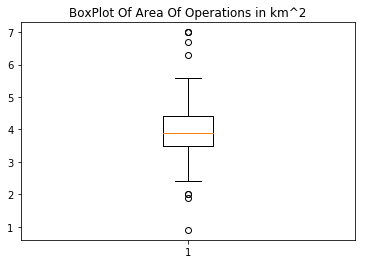

In [8]:
plt.boxplot(fulfilment_center.op_area)
plt.title('BoxPlot Of Area Of Operations in km^2')
plt.show()

In [9]:
print('Unique Center IDs   ', len(fulfilment_center.center_id.unique()))
print('Unique City_Codes   ', len(fulfilment_center.city_code.unique()))
print('Unique Region_code  ', len(fulfilment_center.region_code.unique()))
print("Unique Center_Type  ", len(fulfilment_center.center_type.unique()))

Unique Center IDs    77
Unique City_Codes    51
Unique Region_code   8
Unique Center_Type   3


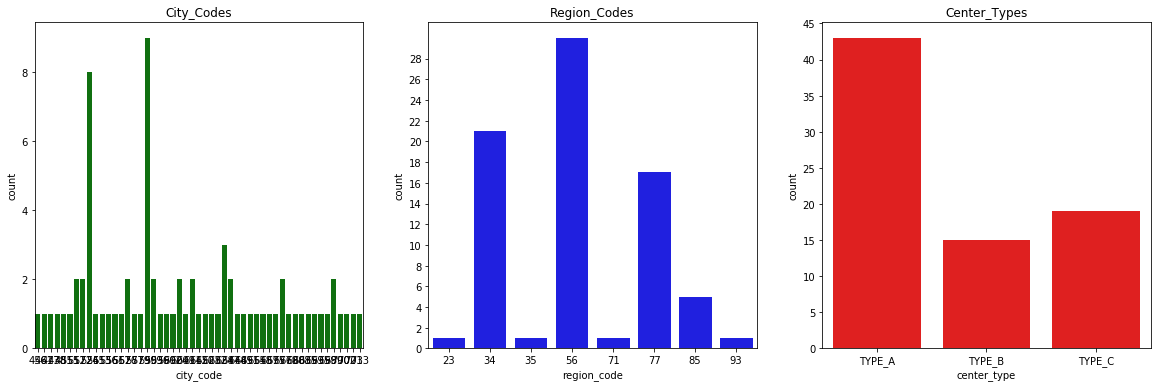

In [10]:
# Distribution Of Categorical Features

fig, axes = plt.subplots(figsize=(20,6), nrows=1,ncols=3)

sns.countplot(fulfilment_center.city_code, ax = axes[0], color='green').set_title('City_Codes')
sns.countplot(fulfilment_center.region_code, ax = axes[1], color='blue').set_title('Region_Codes')
sns.countplot(fulfilment_center.center_type, ax = axes[2], color='red').set_title('Center_Types')

axes[1].set_yticks(np.arange(0,30,2))
axes[2].set_yticks(np.arange(0,50,5))
plt.show()

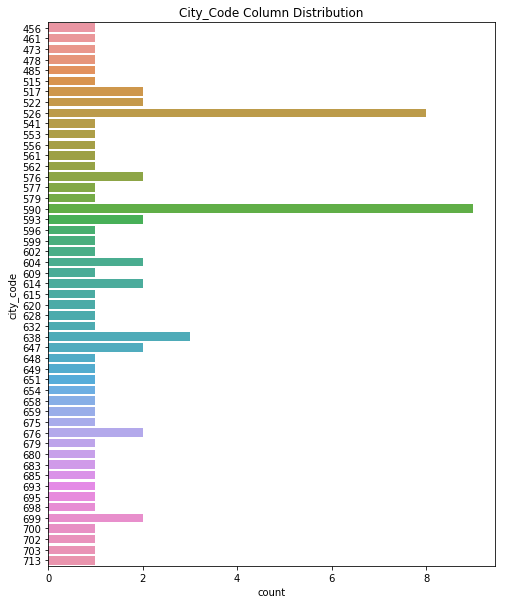

In [11]:
# Only City_Code Column

plt.subplots(figsize = (8, 10))
ax = sns.countplot(y = 'city_code', data = fulfilment_center).set_title('City_Code Column Distribution')

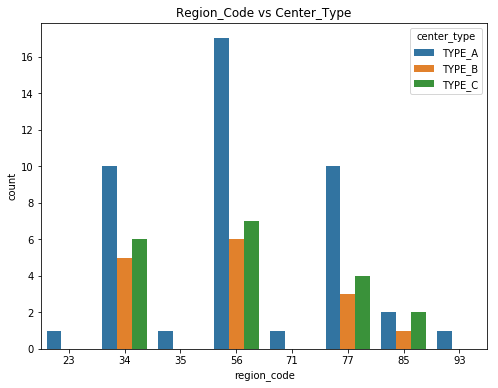

In [12]:
# Region_Code vs Center_Type

plt.subplots(figsize = (8, 6))
ax = sns.countplot(x = 'region_code', hue = 'center_type', data = fulfilment_center).set_title('Region_Code vs Center_Type')

## Meal_Info DataSet

In [13]:
meal_info.tail()

,meal_id,category,cuisine
46,2956,Fish,Continental
47,2104,Fish,Continental
48,2444,Seafood,Continental
49,2867,Seafood,Continental
50,1445,Seafood,Continental


In [14]:
print('Unique Meal IDs   ', len(meal_info.meal_id.unique()))
print('Unique Category   ', len(meal_info.category.unique()))
print('Unique Cuisine  ', len(meal_info.cuisine.unique()))

Unique Meal IDs    51
Unique Category    14
Unique Cuisine   4


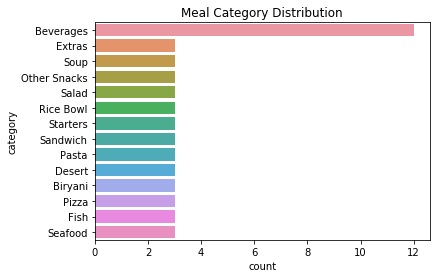

In [15]:
# Category Column
 
ax = sns.countplot(y = "category", data = meal_info).set_title('Meal Category Distribution')

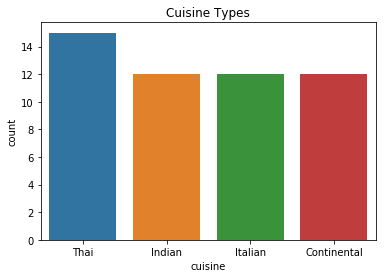

In [16]:
# Cuisine Column

ax1 = sns.countplot(x = "cuisine", data = meal_info).set_title('Cuisine Types')

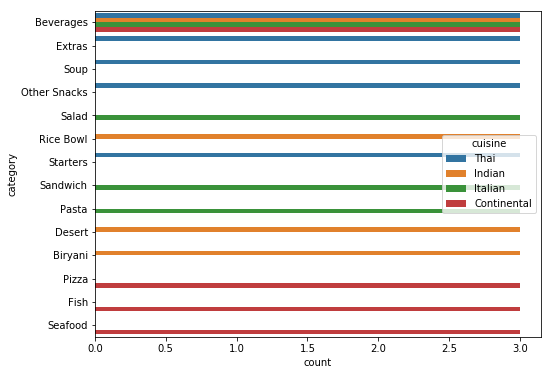

In [17]:
# Cuisine vs Category

plt.subplots(figsize = (8, 6))
ax2 = sns.countplot(y = 'category', hue='cuisine', data = meal_info)

## Train DataSet

In [18]:
train.tail()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729
456547,1361984,145,61,2490,292.03,290.03,0,0,162


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
id                       456548 non-null int64
week                     456548 non-null int64
center_id                456548 non-null int64
meal_id                  456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [20]:
train.loc[:,['checkout_price','base_price','num_orders']].describe()

,checkout_price,base_price,num_orders
count,456548.000000,456548.000000,456548.000000
mean,332.238933,354.156627,261.872760
std,152.939723,160.715914,395.922798
min,2.970000,55.350000,13.000000
25%,228.950000,243.500000,54.000000
50%,296.820000,310.460000,136.000000
75%,445.230000,458.870000,324.000000
max,866.270000,866.270000,24299.000000


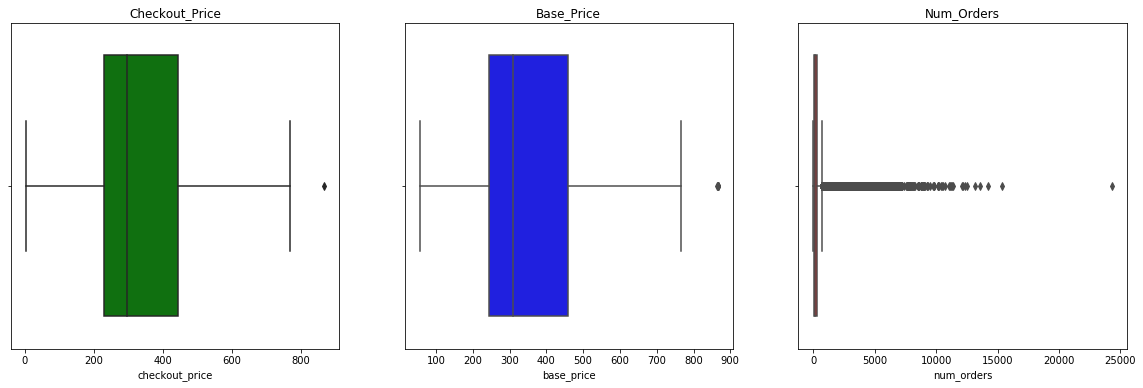

In [21]:
# Boxplot Of Numerical Variables

fig, axes = plt.subplots(figsize=(20,6), nrows=1, ncols=3)

sns.boxplot(train.checkout_price, ax = axes[0], color='green').set_title('Checkout_Price')
sns.boxplot(train.base_price, ax = axes[1], color='blue').set_title('Base_Price')
sns.boxplot(train.num_orders, ax = axes[2], color='red').set_title('Num_Orders')

plt.show()

Corr b/w Orders & Checkout_Price -0.2821083516807998
Corr b/w Orders & Base_Price -0.2223061381406303


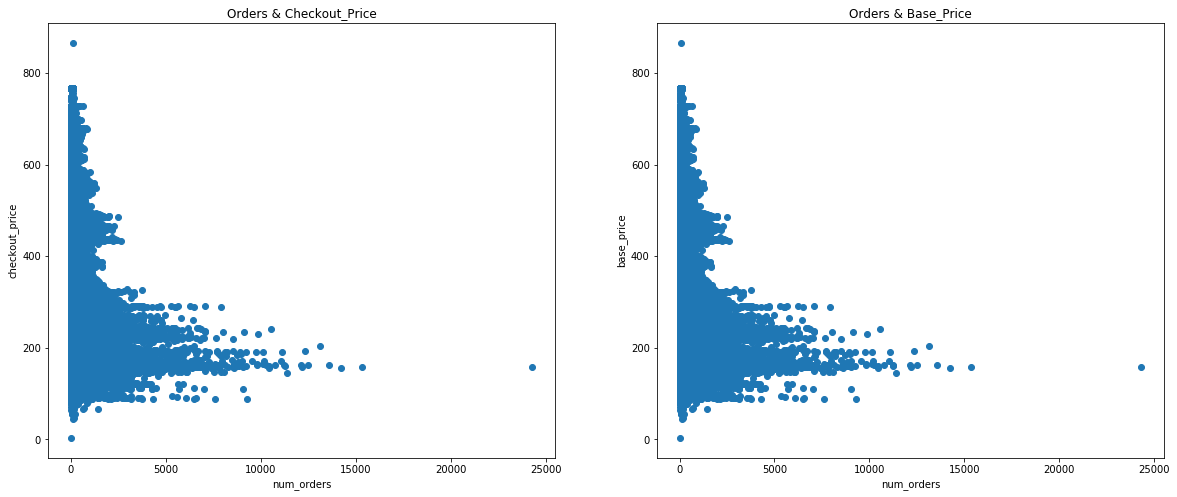

In [22]:
# Correlation Between Target Variable and Independent Numerical variables.

print('Corr b/w Orders & Checkout_Price', train['num_orders'].corr(train['checkout_price']))
print('Corr b/w Orders & Base_Price', train['num_orders'].corr(train['base_price']))

fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize = (20,8))
#fig.autofmt_xdate(rotation = 45)

ax1.scatter(train['num_orders'], train['checkout_price'])
ax1.set_xlabel('num_orders'); ax1.set_ylabel('checkout_price'); ax1.set_title('Orders & Checkout_Price')

# Temperature from 1 day ago
ax2.scatter(train['num_orders'], train['checkout_price'])
ax2.set_xlabel('num_orders'); ax2.set_ylabel('base_price'); ax2.set_title('Orders & Base_Price')
plt.show()

In [23]:
print('Unique IDs                 ', len(train.id.unique()))
print('Unique weeks               ', len(train.week.unique()))
print('Unique center IDs          ', len(train.center_id.unique()))
print('Unique Meal IDs            ', len(train.meal_id.unique()))
print('Unique emailer_for_promotion   ', len(train.emailer_for_promotion.unique()))
print('Unique homepage_featured   ', len(train.homepage_featured.unique()))

Unique IDs                  456548
Unique weeks                145
Unique center IDs           77
Unique Meal IDs             51
Unique emailer_for_promotion    2
Unique homepage_featured    2


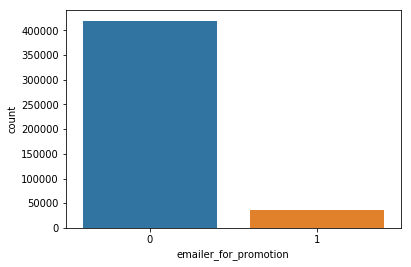

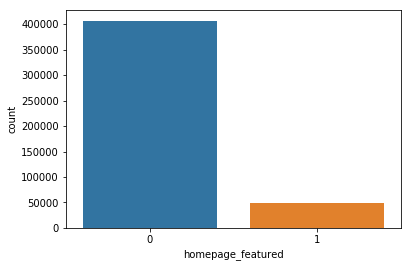

In [29]:
ax = sns.countplot(x = 'emailer_for_promotion', data = train)
plt.show()
ax1 = sns.countplot(x = 'homepage_featured', data = train)
plt.show()